In [99]:
#import dependencies
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#read in CSVs
nu_data = "data_csv/mens_bball_stats_combined.csv"
load_data = "athlete_load_duration_overall.csv"
master_data = "data_csv/catapult_data/athlete_load_data_master_v1.csv"
compiled = "data_csv/compiled_data.csv"

nu_stats = pd.read_csv(nu_data)
load_duration = pd.read_csv(load_data)
master_load = pd.read_csv(master_data)
compiled_data = pd.read_csv(compiled)
compiled_data

,Player_ID,Opponent,Date,Start?,min,FGM,FGA,pct,3FG,3FGA,pct.1,FTM,FTA,pct.2,combo_shots_made,combo_shots_attempt,combo_shots_percent,off,def,tot,avg,pf,AST,T/O,BLK,STl,PTS,avg.1,total_ima,ima_high_avg,ima_high_total,ima_medium_total,ima_low_total,ima_per_min,ima_accel_high,ima_acel_medium,ima_acel_low,ima_decel_high,ima_decel_medium,ima_decel_low,average_duration,total_player_load,average_player_load,peak_player_load,player_load_per_minute,total_jumps,jumps_avg,jumps_per_minute,high_intensity_jumps,med_intesnity_jumps,low_intensity_jumps,rhie_bout_recovery_max,rhie_bout_recovery_min,rhie_bout_recovery_mean,rhie_effort_duration_max,rhie_effort_duration_min,rhie_effort_duration_max.1,rhie_effort_per_bout,rhie_effort_per_bout_max,rhie_effort_recovery_min,rhie_effort_recovery_mean,rhie_total_bouts,rhie_efforts_per_bout_min
0,bc83f44d-fdf4-42a7-a23b-565de107bb9c,Loyola (Md.),11/10/2017,Yes,35,4,12,0,1,4,0,3,5,1,8,21,0.0,1.0,6.0,7,7,4,1,0,3,0,12,12,992,62,62,172,757,6,9,18,90,23,43,165,0,772,78,4,5,142,142,1,79,43,20,1029.0,0.0,274.0,0.0,0.0,0.0,6.0,16.0,0.0,3.0,12.0,2.0
1,bc83f44d-fdf4-42a7-a23b-565de107bb9c,Saint Peter's,11/13/2017,Yes,35,4,8,1,1,4,0,1,1,1,6,13,0.0,2.0,5.0,7,7,1,1,2,1,2,10,11,913,49,49,158,706,7,6,17,79,18,36,145,0,659,81,4,5,119,119,1,76,24,19,783.0,0.0,235.0,0.0,0.0,0.0,5.0,17.0,0.0,2.0,10.0,0.0
2,bc83f44d-fdf4-42a7-a23b-565de107bb9c,Creighton,11/15/2017,Yes,39,11,19,1,5,10,1,3,4,1,19,33,1.0,2.0,3.0,5,6,4,1,2,2,1,30,17,942,51,51,168,723,7,6,16,79,17,39,143,0,651,77,4,5,119,119,1,76,22,21,826.0,0.0,251.0,0.0,0.0,0.0,5.0,18.0,0.0,2.0,10.0,0.0
3,bc83f44d-fdf4-42a7-a23b-565de107bb9c,La Salle,11/18/2017,Yes,33,4,11,0,0,3,0,0,0,0,4,14,0.0,4.0,4.0,8,7,2,5,1,2,0,8,15,945,48,48,168,729,7,6,14,75,13,44,137,0,672,78,5,5,107,107,1,63,20,24,728.0,0.0,226.0,0.0,0.0,0.0,5.0,15.0,0.0,2.0,10.0,0.0
4,bc83f44d-fdf4-42a7-a23b-565de107bb9c,Texas Tech,11/19/2017,Yes,31,1,6,0,1,3,0,1,2,1,3,11,0.0,0.0,4.0,4,6,4,0,4,0,0,4,13,915,50,50,167,699,7,6,13,76,14,45,135,0,666,77,5,5,94,94,1,55,16,24,835.0,0.0,215.0,0.0,0.0,0.0,4.0,11.0,0.0,2.0,10.0,0.0
5,bc83f44d-fdf4-42a7-a23b-565de107bb9c,Sacred Heart,11/24/2017,Yes,29,5,9,1,2,5,0,3,3,1,10,17,1.0,1.0,0.0,1,5,1,2,1,0,1,15,13,1301,86,86,241,974,7,11,24,97,26,53,185,0,976,81,7,6,153,153,1,83,35,36,1218.0,0.0,262.0,0.0,0.0,0.0,5.0,11.0,0.0,3.0,17.0,0.0
6,bc83f44d-fdf4-42a7-a23b-565de107bb9c,Georgia Tech,11/28/2017,Yes,33,5,8,1,1,2,1,1,1,1,7,11,1.0,1.0,4.0,5,5,2,2,1,0,3,12,13,1304,78,85,236,983,7,11,23,91,26,52,185,0,974,82,6,5,166,151,1,83,45,38,1742.0,0.0,368.0,0.0,0.0,0.0,5.0,12.0,0.0,2.0,16.0,0.0
7,bc83f44d-fdf4-42a7-a23b-565de107bb9c,Illinois,12/1/2017,Yes,35,6,11,1,2,7,0,2,2,1,10,20,1.0,1.0,6.0,7,6,5,1,1,0,1,16,13,1034,44,59,179,796,6,8,16,76,16,50,163,0,838,75,5,5,156,118,1,88,44,24,1594.0,3.0,379.0,0.0,0.0,0.0,5.0,14.0,0.0,3.0,14.0,1.0
8,bc83f44d-fdf4-42a7-a23b-565de107bb9c,Purdue,12/3/2017,Yes,33,4,9,0,3,4,1,1,2,1,8,15,1.0,3.0,7.0,10,6,3,4,1,0,1,12,13,1102,50,65,195,842,6,9,18,87,19,58,176,0,900,78,5,5,174,136,1,98,48,28,1648.0,3.0,379.0,0.0,0.0,0.0,5.0,14.0,0.0,3.0,16.0,2.0
9,bc83f44d-fdf4-42a7-a23b-565de107bb9c,Chicago State,12/11/2017,Yes,17,4,6,1,3,4,1,7,7,1,14,17,1.0,0.0,3.0,3,6,3,0,0,0,1,18,14,993,63,63,180,750,7,9,17,80,18,48,168,0,803,84,5,6,159,159,1,74,60,24,1102.0,3.0,310.0,0.0,0.0,0.0,5.0,13.0,0.0,3.0,14.0,3.0


In [100]:
list(compiled_data)

['Player_ID',
 'Opponent',
 'Date',
 'Start?',
 'min',
 'FGM',
 'FGA',
 'pct',
 '3FG',
 '3FGA',
 'pct.1',
 'FTM',
 'FTA',
 'pct.2',
 'combo_shots_made',
 'combo_shots_attempt',
 'combo_shots_percent',
 'off',
 'def',
 'tot',
 'avg',
 'pf',
 'AST',
 'T/O',
 'BLK',
 'STl',
 'PTS',
 'avg.1',
 'total_ima',
 'ima_high_avg',
 'ima_high_total',
 'ima_medium_total',
 'ima_low_total',
 'ima_per_min',
 'ima_accel_high',
 'ima_acel_medium',
 'ima_acel_low',
 'ima_decel_high',
 'ima_decel_medium',
 'ima_decel_low',
 'average_duration',
 'total_player_load',
 'average_player_load',
 'peak_player_load',
 'player_load_per_minute',
 'total_jumps',
 'jumps_avg',
 'jumps_per_minute',
 'high_intensity_jumps',
 'med_intesnity_jumps',
 'low_intensity_jumps',
 'rhie_bout_recovery_max',
 'rhie_bout_recovery_min',
 'rhie_bout_recovery_mean',
 'rhie_effort_duration_max',
 'rhie_effort_duration_min',
 'rhie_effort_duration_max.1',
 'rhie_effort_per_bout',
 'rhie_effort_per_bout_max',
 'rhie_effort_recovery_min'

In [249]:
# Assign the data to X and y

X = compiled_data['min'].values.reshape(-1, 1)
y = compiled_data['rhie_effort_recovery_mean'].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (601, 1) (601, 1)


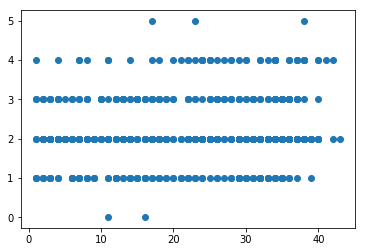

In [250]:
#scatter plot
plt.scatter(X, y)

In [237]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [238]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

# master_load['total_ima'].fillna(0, inplace=True)
# master_load['total_jumps'].fillna(0, inplace=True)
# master_load['total_player_load'].fillna(0, inplace=True)

model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [239]:
# Print the coefficient and the intercept for the model
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[ 0.59867712]]
y-axis intercept:  [ 53.84271909]


In [240]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1]]
Max X Value: [[43]]


In [241]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

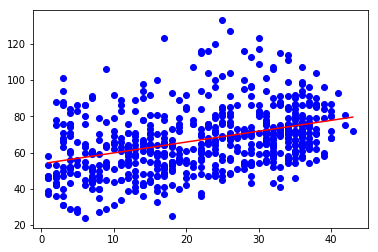

In [242]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [243]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 274.2674019593333
R-squared (R2 ): 0.1427473154266904


In [143]:
# Overall Score for the model
model.score(X, y)

0.57319394316604289